# Urban Hierarchies of the United States using population and Gross Domestic Income (GDP) data

This Jupyter notebook analyzes the urban hierarchy of the United States using population and Gross Domestic Income (GDP) data. For the analysis, this notebook utilizes varous Python packages: Pandas (https://pandas.pydata.org/), GeoPandas (https://geopandas.org/en/stable/#), Matplotlib (https://matplotlib.org/) and Scipy (https://scipy.org/). 

### Data: 
- County Geometry: https://www.census.gov/geographies/mapping-files/time-series/geo/tiger-line-file.html 
- County-level Population (American Community Survey): https://www.census.gov/programs-surveys/acs/data.html 
- County-level GDP (Bureau of Economic Analysis): https://www.bea.gov/data/gdp/gdp-county-metro-and-other-areas

### Steps: 
1. Preprocessing County Geometry with GeoPandas <br>
    1.1. Read the shapefile using GeoPandas <br>
    1.2. Calculate two-digit State ID using county-level GEOID <br>
    1.3. Select counties only for conterminous United States <br>

2. Preprocessing GDP data with Pandas <br>
    2.1. Load Excel File with Pandas <br>
    2.2. Check the data type of columns of the Pandas DataFrame and change the data type accordingly <br>
    2.3. Solve the problem of missing leading zero (e.g., Alabama: 01) <br>
    2.4. Select rows based on a condition <br>

3. Plotting county-level GDP for the conterminous United States <br>
    3.1. Join (Merge) county geometry and GDP data <br>
    3.2. Make a choropleth map of GDP data
        - Classification
        - Change colors
        - Legend
        - Change coordinate system
        - Multiple layers


4. Hands-on practice using population data with Pandas and GeoPandas  <br>
    4.1. Preprocessing the population data with Pandas <br>
    4.2. Plotting county-level population for the conterminous United States <br>

# Import Packages
A Python package is a way of organizing related Python modules into a single directory hierarchy. It provides a mechanism for grouping Python code files, resources, and configuration settings in a structured manner, making it easier to manage and distribute code. They also facilitate code reuse and distribution by allowing developers to bundle related functionality together and share it with others.

We will be using the following packages in this notebook: <br>
`pandas` is a Python package providing fast, flexible, and expressive data structures designed to make working with “relational” or “labeled” data both easy and intuitive. <br>
source: https://pandas.pydata.org/docs/getting_started/overview.html

`geopandas` is the geographic expansion of `pandas`, allowing to have geometry and working with vector data. <br>
source: https://geopandas.org/en/stable/getting_started/introduction.html

`matplotlib` provides a collection of functions that make plots and maps. Each pyplot function makes some change to a figure: e.g., creates a figure, creates a plotting area in a figure, plots some lines in a plotting area, decorates the plot with labels, etc. <br>
source: https://matplotlib.org/stable/users/getting_started/

In [1]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt

/var/folders/pz/gjtw38596y3_mm15469h9jy40000gn/T/ipykernel_89772/3771535966.py:1: DeprecationWarning: Shapely 2.0 is installed, but because PyGEOS is also installed, GeoPandas still uses PyGEOS by default. However, starting with version 0.14, the default will switch to Shapely. To force to use Shapely 2.0 now, you can either uninstall PyGEOS or set the environment variable USE_PYGEOS=0. You can do this before starting the Python process, or in your code before importing geopandas:

import os
os.environ['USE_PYGEOS'] = '0'
import geopandas

In the next release, GeoPandas will switch to using Shapely by default, even if PyGEOS is installed. If you only have PyGEOS installed to get speed-ups, this switch should be smooth. However, if you are using PyGEOS directly (calling PyGEOS functions on geometries from GeoPandas), this will then stop working and you are encouraged to migrate from PyGEOS to Shapely 2.0 (https://shapely.readthedocs.io/en/latest/migration_pygeos.html).
  import geopanda

# 1. Preprocessing County Geometry with GeoPandas
## 1.1. Read the shapefile using GeoPandas

In [2]:
# .read_file() method is used to read various spatial data formats (shapefile, GeoJSON, etc.)
county_gdf = gpd.read_file('./data/county_simplified.shp')
county_gdf

,GEOID,NAME,geometry
0,01001,"Autauga County, Alabama","POLYGON ((-86.45876 32.40573, -86.46056 32.404..."
1,01003,"Baldwin County, Alabama","POLYGON ((-87.93604 30.26147, -87.91825 30.253..."
2,01005,"Barbour County, Alabama","POLYGON ((-85.74174 31.61940, -85.73981 31.621..."
3,01007,"Bibb County, Alabama","POLYGON ((-86.87630 33.00306, -86.87644 33.000..."
4,01009,"Blount County, Alabama","POLYGON ((-86.57753 33.80198, -86.57780 33.765..."
...,...,...,...
3229,72151,"Yabucoa Municipio, Puerto Rico","POLYGON ((-65.82748 18.05507, -65.82910 18.052..."
3230,72153,"Yauco Municipio, Puerto Rico","POLYGON ((-66.87603 18.01490, -66.87813 18.016..."
3231,78010,NaN,"MULTIPOLYGON (((-64.84404 17.68717, -64.84570 ..."
3232,78020,NaN,"MULTIPOLYGON (((-64.79905 18.32969, -64.79862 ..."


In [3]:
# When you import a spatial data, the type of the object is a GeoDataFrame
type(county_gdf)

geopandas.geodataframe.GeoDataFrame

In [4]:
county_gdf.columns

Index(['GEOID', 'NAME', 'geometry'], dtype='object')

In [5]:
county_gdf['GEOID']

0       01001
1       01003
2       01005
3       01007
4       01009
        ...  
3229    72151
3230    72153
3231    78010
3232    78020
3233    78030
Name: GEOID, Length: 3234, dtype: object

<Axes: >

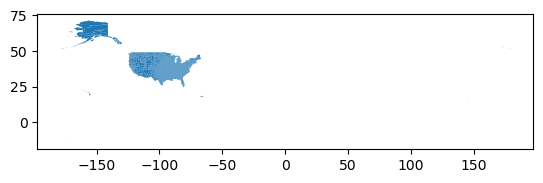

In [6]:
# You can use .plot() method to plot the GeoDataFrame. If there is no 'geometry' column, it will plot a numerical values.
county_gdf.plot()

In [7]:
county_gdf.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

## 1.2. Calculate two-digit State ID using five-digit county-level GEOID

Since the US has territory outside of the conterminous United States (e.g., Hawaii, Puerto Rico), so we need to use the two-digit state code to select the counties in the conterminous United States.

In [8]:
# .iterrows() method is used to iterate over the rows of a DataFrame. It returns an iterator containing index of each row and the data in each row as a Series.
for idx, row in county_gdf.iterrows():

    # .at[] method is used to access a single value for a row/column label pair.
    # row['GEOID'] is a string, so we can use string slicing to get the first two characters of the string.
    county_gdf.at[idx, 'STATE'] = row['GEOID'][0:2]

county_gdf

,GEOID,NAME,geometry,STATE
0,01001,"Autauga County, Alabama","POLYGON ((-86.45876 32.40573, -86.46056 32.404...",01
1,01003,"Baldwin County, Alabama","POLYGON ((-87.93604 30.26147, -87.91825 30.253...",01
2,01005,"Barbour County, Alabama","POLYGON ((-85.74174 31.61940, -85.73981 31.621...",01
3,01007,"Bibb County, Alabama","POLYGON ((-86.87630 33.00306, -86.87644 33.000...",01
4,01009,"Blount County, Alabama","POLYGON ((-86.57753 33.80198, -86.57780 33.765...",01
...,...,...,...,...
3229,72151,"Yabucoa Municipio, Puerto Rico","POLYGON ((-65.82748 18.05507, -65.82910 18.052...",72
3230,72153,"Yauco Municipio, Puerto Rico","POLYGON ((-66.87603 18.01490, -66.87813 18.016...",72
3231,78010,NaN,"MULTIPOLYGON (((-64.84404 17.68717, -64.84570 ...",78
3232,78020,NaN,"MULTIPOLYGON (((-64.79905 18.32969, -64.79862 ...",78


## 1.3. Select counties only for conterminous United States

In [9]:
# GEOID for Conterminous US States (Lower 48 States)
lower_48_states = ['01', '04', '05', '06', '08', '09', '10', '11', '12', '13', '16', '17', '18', '19', '20',
                   '21', '22', '23', '24', '25', '26', '27', '28', '29', '30', '31', '32', '33', '34', '35', 
                   '36', '37', '38', '39', '40', '41', '42', '44', '45', '46', '47', '48', '49', '50', '51', 
                   '53', '54', '55', '56']

In [10]:
# It is possible to compare the value within the Series to a list of values or a single value. The result is a boolean Series.
county_gdf['STATE'] == '38' # North Dakota

0       False
1       False
2       False
3       False
4       False
        ...  
3229    False
3230    False
3231    False
3232    False
3233    False
Name: STATE, Length: 3234, dtype: bool

In [11]:
# .loc method is used to access a group of rows and columns by label(s) or a boolean array.
county_gdf.loc[county_gdf['STATE'] == '38']

,GEOID,NAME,geometry,STATE
1991,38001,"Adams County, North Dakota","POLYGON ((-102.99537 46.03213, -102.99525 46.1...",38
1992,38003,"Barnes County, North Dakota","POLYGON ((-97.95019 47.24042, -97.94019 47.240...",38
1993,38005,"Benson County, North Dakota","POLYGON ((-98.94480 48.00280, -98.94078 48.001...",38
1994,38007,"Billings County, North Dakota","POLYGON ((-103.66701 47.12447, -103.66691 47.1...",38
1995,38009,"Bottineau County, North Dakota","POLYGON ((-100.92058 48.99956, -100.91794 48.9...",38
1996,38011,"Bowman County, North Dakota","POLYGON ((-104.04576 46.12395, -104.04524 46.1...",38
1997,38013,"Burke County, North Dakota","POLYGON ((-102.93966 48.76401, -102.93946 48.8...",38
1998,38015,"Burleigh County, North Dakota","POLYGON ((-100.83024 46.77585, -100.82912 46.7...",38
1999,38017,"Cass County, North Dakota","POLYGON ((-96.79627 46.80343, -96.79610 46.803...",38
2000,38019,"Cavalier County, North Dakota","POLYGON ((-99.00013 48.89118, -99.00045 48.891...",38


In [12]:
# It is also possible to use the .isin() method to filter a DataFrame based on a list of values.
county_gdf = county_gdf.loc[county_gdf['STATE'].isin(lower_48_states)]
county_gdf

,GEOID,NAME,geometry,STATE
0,01001,"Autauga County, Alabama","POLYGON ((-86.45876 32.40573, -86.46056 32.404...",01
1,01003,"Baldwin County, Alabama","POLYGON ((-87.93604 30.26147, -87.91825 30.253...",01
2,01005,"Barbour County, Alabama","POLYGON ((-85.74174 31.61940, -85.73981 31.621...",01
3,01007,"Bibb County, Alabama","POLYGON ((-86.87630 33.00306, -86.87644 33.000...",01
4,01009,"Blount County, Alabama","POLYGON ((-86.57753 33.80198, -86.57780 33.765...",01
...,...,...,...,...
3138,56037,"Sweetwater County, Wyoming","POLYGON ((-110.04890 41.46490, -110.04800 41.5...",56
3139,56039,"Teton County, Wyoming","POLYGON ((-111.04558 43.61783, -111.04563 43.6...",56
3140,56041,"Uinta County, Wyoming","POLYGON ((-110.58367 41.57916, -110.57956 41.5...",56
3141,56043,"Washakie County, Wyoming","POLYGON ((-108.55056 44.16846, -108.50652 44.1...",56


In [13]:
# Displaying the entire DataFrame takes lots of spaces, so we can use the .head() method to display the first five rows of the DataFrame.
county_gdf.head()

,GEOID,NAME,geometry,STATE
0,01001,"Autauga County, Alabama","POLYGON ((-86.45876 32.40573, -86.46056 32.404...",01
1,01003,"Baldwin County, Alabama","POLYGON ((-87.93604 30.26147, -87.91825 30.253...",01
2,01005,"Barbour County, Alabama","POLYGON ((-85.74174 31.61940, -85.73981 31.621...",01
3,01007,"Bibb County, Alabama","POLYGON ((-86.87630 33.00306, -86.87644 33.000...",01
4,01009,"Blount County, Alabama","POLYGON ((-86.57753 33.80198, -86.57780 33.765...",01


<Axes: >

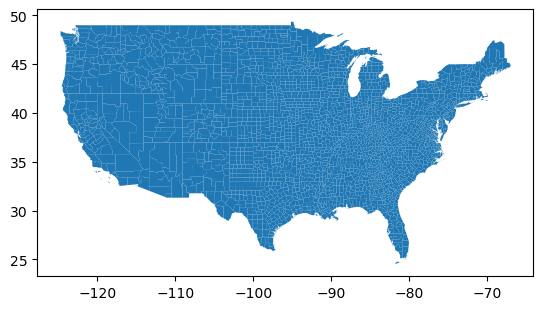

In [14]:
# You can use .plot() method to plot the GeoDataFrame. If there is no 'geometry' column, it will plot a numerical values.
county_gdf.plot()

In [15]:
county_gdf.to_file('./data/county_cleaned.shp')

---
### *Exercise*
1. (4 points) The following in the syntax for the `loc` function in Pandas. Select rows for New York State (State ID: 36) and assign it to a new variable called `ny_gdf`. <br>

    ```python
    ny_gdf = county_gdf.loc[county_gdf['COLUMN NAME'] == 'STATE ID']
    ```

---

In [ ]:
# Your code here

ny_gdf = county_gdf.loc[county_gdf['COLUMN NAME'] == 'STATE ID']
ny_gdf


In [ ]:
""" Test code for the previous function. 
This cell should NOT give any errors when it is run."""

assert ny_gdf['STATE'].unique() == '36'
assert ny_gdf.shape[0] == 62

print("Success!")

# 2. Preprocessing GDP data with Pandas
## 2.1. Load Excel File with Pandas

In [ ]:
# To read a Excel file, you can use `pandas` package and .read_excel() method.
# You can also use .read_csv() method to read a CSV file.
# the output of .read_excel() and .read_csv() method is a DataFrame
gdp_df = pd.read_excel('data/GDP_data_cleaned.xlsx')
gdp_df

In [ ]:
type(gdp_df)

## 2.2. Check the data type of columns of the Pandas DataFrame and change the data type accordingly

In [ ]:
# Using .dtypes attribute, you can check the data type of each column.
gdp_df.dtypes

In [ ]:
# Since the 'GeoFips' column is a numerical value, we need to convert it to a string.
# You can use .astype() method to convert the data type of a column.
gdp_df['GeoFips'] = gdp_df['GeoFips'].astype(str)
gdp_df.dtypes

## 2.3. Solve the problem of missing leading zero (e.g., Alabama: 01)

You will notice that the entry of GeoFips column is missing the leading zero for the state code. For example, the state code for Alabama is '01', but the entry of GeoFips column is '1' (no leading zero). It is a common problem when you save string into excel or csv file. Now, we need to add the leading zero to the state code.

In [ ]:
gdp_df

In [ ]:
# .iterrows() method is used to iterate over the rows of a DataFrame. It returns an iterator containing index of each row and the data in each row as a Series.
for idx, row in gdp_df.iterrows():
    
    # Check the length of the GeoFips column (i.e., len(row['GeoFips']))
    if len(row['GeoFips']) == 4: # if the length of the GeoFips column is 4, it means that there is a missing leading zero.
        gdp_df.at[idx, 'GEOID'] = '0' + row['GeoFips'] # add a leading zero to the GeoFips column
    elif len(row['GeoFips']) == 5: # if the length of the GeoFips column is 5, it means that there is no missing leading zero.
        gdp_df.at[idx, 'GEOID'] = row['GeoFips']
    else:  # You can also check if there are any unexpected length of GeoFips column.
        print('Unexpected Length of GeoFips')

gdp_df

## 2.4. Select rows based on a condition

Each county has three records (Real GDP, Chain-type quantity indexes for real GDP, Current-dollar GDP) with the same value of GeoFips. We only need the record of Real GDP. So, we need to select the rows based on the value of Line Code column (Real GDP has the value of 1 in the `LineCode` column).

.loc method syntax is `df.loc[row condition, column condition]`. <br>
You can enter the list of columns you want to select in the column condition. If you want to select all columns, you can use `:`.

In [ ]:
gdp_df = gdp_df.loc[gdp_df['LineCode'] == 1, ['GEOID', 'GeoName', 'GDP']]
gdp_df

# 3. Plotting county-level GDP for the conterminous United States
## 3.1. Join (Merge) county geometry and GDP data

Currently, `county_gdf` has geometry data and `gdp_df` has GDP data. We need to join (merge) these two datasets to make a choropleth map.

In [ ]:
# Checking `count_gdf`
county_gdf

In [ ]:
# Checking `gdp_df`
gdp_df

Both `county_gdf` and `gdp_df` have the column of `GEOID`, so that it can be used for the join. 

In [ ]:
# It is also recommend to check the data type of the column(s) that you want to merge.
gdp_df.dtypes

In [ ]:
county_gdf.dtypes

Merge (join) method syntax is `df1.merge(df2, on='COLUMN NAME')`. <br>

resource: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.merge.html

In [ ]:
gdp_gdf = county_gdf.merge(gdp_df, on='GEOID', how='left')
gdp_gdf

In [ ]:
# Since we did the left-join, there are some missing values in the GDP column.
# The following code is to select the rows that have missing values (NULL/NaN value ) in the GDP column.

gdp_gdf.loc[gdp_gdf['GDP'].isna()]

In [ ]:
# We can simply replace the NaN values with 0, using .fillna() method.
gdp_gdf['GDP'] = gdp_gdf['GDP'].fillna(0)

In [ ]:
# NaN values are gone!
gdp_gdf.loc[gdp_gdf['GDP'].isna()]

In [ ]:
gdp_gdf

## 3.2. Make a choropleth map of GDP data 

GeoDataFrame has a built-in function called `plot` to make a choropleth map. <br>

Syntax: `GeoDataFrame.plot(column='COLUMN NAME', cmap='COLOR MAP NAME', legend=True, figsize=(WIDTH, HEIGHT))`

In [ ]:
gdp_gdf.plot(column='GDP', figsize=(10,10), legend=True)

`camp` attribute is used to change the color map. <br>
various color maps: https://matplotlib.org/stable/users/explain/colors/colormaps.html

In [ ]:
gdp_gdf.plot(column='GDP', cmap='Blues', figsize=(10,10), legend=True)

`scheme` attribute is used to change the classification method. <br>
various classification methods: https://pysal.org/mapclassify/api.html

In [ ]:
gdp_gdf.plot(column='GDP', cmap='Blues', scheme='NaturalBreaks', figsize=(10,10), legend=True)

In [ ]:
gdp_gdf.plot(column='GDP', cmap='Blues', scheme='NaturalBreaks', figsize=(10,10), legend=True, k=7)

The current coordinate system of `gdp_gdf` is NAD83, and we want to change it to a Projected Coordinate System. <br>
You can use `to_crs` function to change the coordinate system based on a epsg code. <br>
You can find the EPSG code of the coordinate system you want to use from https://epsg.io/. <br>

In [ ]:
gdp_gdf = gdp_gdf.to_crs(epsg=5070)
gdp_gdf.plot(column='GDP', cmap='Blues', scheme='NaturalBreaks', figsize=(10,10), legend=True, k=7)

The current map is missing the state boundary, making the interpretation of the map difficult. <br>
We can create a new layer of state boundary using `state_gdf` and add it to the current map. <br>

In [ ]:
county_gdf

In [ ]:
# .dissolve() method is used to dissolve a GeoDataFrame based on a column.
state_gdf = county_gdf.dissolve('STATE')
state_gdf

In [ ]:
state_gdf.plot()

In [ ]:
# To overlay two layers, we need to match the crs of the state_gdf to the crs of the gdp_gdf.
state_gdf = state_gdf.to_crs(epsg=5070)
state_gdf.plot()

In [ ]:
# You can use .boundary attribute to get the boundary of the GeoDataFrame.
state_gdf.boundary.plot()

In [ ]:
fig, ax = plt.subplots(figsize=(10,10))

gdp_gdf.plot(column='GDP', cmap='Blues', scheme='NaturalBreaks', figsize=(10,10), legend=True, k=7, ax=ax, legend_kwds={'loc': 'lower left'})
state_gdf.boundary.plot(ax=ax, color='black', linewidth=0.5, alpha=0.5)
plt.show()

To see the top 10 counties with the highest GDP, we can sort the GeoDataFrame by the GDP column and select the top 10 rows. <br>

syntax: `GeoDataFrame.sort_values(by='COLUMN NAME', ascending=False)`

In [ ]:
gdp_gdf = gdp_gdf.sort_values(by='GDP', ascending=False)
gdp_gdf.head(10)

# Summary

the following is the backbone of the code for the analysis. <br>

In [ ]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt

# Read the county shapefile
county_gdf = gpd.read_file('./data/county_simplified.shp')

# Assign the first two characters of the GEOID column to the STATE column
for idx, row in county_gdf.iterrows():
    county_gdf.at[idx, 'STATE'] = row['GEOID'][0:2]

# GEOID for Conterminous US States (Lower 48 States)
lower_48_states = ['01', '04', '05', '06', '08', '09', '10', '11', '12', '13', '16', '17', '18', '19', '20',
                   '21', '22', '23', '24', '25', '26', '27', '28', '29', '30', '31', '32', '33', '34', '35', 
                   '36', '37', '38', '39', '40', '41', '42', '44', '45', '46', '47', '48', '49', '50', '51', 
                   '53', '54', '55', '56']


# It is also possible to use the .isin() method to filter a DataFrame based on a list of values.
county_gdf = county_gdf.loc[county_gdf['STATE'].isin(lower_48_states)]
county_gdf

In [ ]:
# Read the GDP Excel data
gdp_df = pd.read_excel('data/GDP_data_cleaned.xlsx')

# convert the GeoFips column to string
gdp_df['GeoFips'] = gdp_df['GeoFips'].astype(str) 

# Add a leading zero to the GeoFips column if the length of the GeoFips column is 4
for idx, row in gdp_df.iterrows():
    if len(row['GeoFips']) == 4: 
        gdp_df.at[idx, 'GEOID'] = '0' + row['GeoFips'] 
    elif len(row['GeoFips']) == 5: 
        gdp_df.at[idx, 'GEOID'] = row['GeoFips']
    else:  
        print('Unexpected Length of GeoFips')

gdp_df

In [ ]:
# Join the county GeoDataFrame (county_gdf) and the GDP DataFrame (gdp_df)
gdp_gdf = county_gdf.merge(gdp_df, on='GEOID', how='left')

# Fill the NaN values in the GDP column with 0
gdp_gdf['GDP'] = gdp_gdf['GDP'].fillna(0)

# Change coordinate system for better visualization
gdp_gdf = gdp_gdf.to_crs(epsg=5070)

gdp_gdf

In [ ]:
# .dissolve() method is used to dissolve a GeoDataFrame based on a column.
state_gdf = county_gdf.dissolve('STATE')

# To overlay two layers, we need to match the crs of the state_gdf to the crs of the gdp_gdf.
state_gdf = state_gdf.to_crs(epsg=5070)


In [ ]:
# Plot the GDP by county

fig, ax = plt.subplots(figsize=(10,10))

gdp_gdf.plot(column='GDP', cmap='Blues', scheme='NaturalBreaks', figsize=(10,10), legend=True, k=7, ax=ax, legend_kwds={'loc': 'lower left'})
state_gdf.boundary.plot(ax=ax, color='black', linewidth=0.5, alpha=0.5)

plt.show()

# 4. Hands-on practice using population data with Pandas and GeoPandas

For this section, you will be using the population data to make a choropleth map of population for the conterminous United States. <br>
The major structure will be very similar to the GDP map. If you are stuck, you can consult with the summary above<br>
To complete the hands-on practice, please follow the steps below. <br>

## 4.1. Preprocessing the population data with Pandas 

In [ ]:
# Read the population data from the American Community Survey (ACS)
pop_df = pd.read_csv('./data/ACSDP5Y2020.DP05-Data.csv')
pop_df

---
### *Exercise*
2. (5 points) The following in the syntax for the `loc` function in Pandas. Select three columns ('GEO_ID', 'NAME', 'DP05_001E') for `pop_df` and assign the selection back to `pop_df` <br>

    'GEO_ID' is the IDs of counties <br>
    'NAME' is the county name. <br>
    'DP05_001E' is the population per county. <br>

    ```python
    `DataFrame` = `DataFrame`.loc[row condition, column condition]
    ```
---

In [ ]:
# Your code here
pop_df = pop_df.loc['ROW CONDITION', 'COLUMN CONDITION']
pop_df

In [ ]:
""" Test code for the previous function. 
This cell should NOT give any errors when it is run."""

assert pop_df.columns.to_list() == ['GEO_ID', 'NAME', 'DP05_0001E']
assert pop_df.shape == (3221, 3)

print("Success!")

---
### *Exercise*
3. Get the two-digit state ID and five-digit county ID from the `GEO_ID` column. Currently the information in the `GEO_ID` column is something like '0500000US01001'. <br>
3.1. (3 points) Iterate through population dataframe (`pop_df`) using for loop and .iterrows() method. <br><br>
3.2. (3 points) Within the for loop, slice the information in the `GEO_ID` column using its index to get the two-digit state ID and five-digit county ID. For the five-digit county ID, you can assign it to `GEOID` column and two-digit state ID need to be assigned to `STATE` column. <br>
Hint: df.at[index, 'COLUMN NAME'] = 'VALUE' <br>


Expected results are as follows: <br>
<img src="./images/q3.jpg">
---

In [ ]:
# Your code here

pop_df

In [ ]:
""" Test code for the previous function. 
This cell should NOT give any errors when it is run."""

assert 'STATE' in pop_df.columns.to_list()
assert 'GEOID' in pop_df.columns.to_list()
assert pop_df.at[0, 'STATE'] == '01'
assert pop_df.shape == (3221, 5)

print("Success!")

The following cell is to select counties for the conterminous United States. <br>

In [ ]:
pop_df = pop_df.loc[pop_df['STATE'].isin(lower_48_states)].reset_index(drop=True)
pop_df

## 4.2. Plotting county-level population for the conterminous United States

---
### *Exercise*
4. (5 points) Join `county_gdf` and `pop_df` using the `.merge()` method. Merge method syntax is `df1.merge(df2, on='COLUMN NAME', how='left')`. <br>
You want you merge `pop_df` into `county_gdf` based on the `GEOID` column, and assigned the result into a new GeoDataFrame with the name of `pop_gdf`. <br>
<br>
resource: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.merge.html

Expected results are as follows: <br>
<img src="./images/q4.jpg">

---



In [ ]:
# Your code here

pop_gdf

In [ ]:
""" Test code for the previous function. 
This cell should NOT give any errors when it is run."""

assert 'GEOID' in pop_gdf.columns.to_list()
assert 'geometry' in pop_gdf.columns.to_list()
assert 'DP05_0001E' in pop_gdf.columns.to_list()
assert pop_gdf.shape == (3108, 8)

print("Success!")

---
### *Exercise*
5. (5 points) Change the projection of `county_gdf` to `NAD83 / Conus Albers (EPSG: 5070)` using the `to_crs` method. You can simply use the syntax below. <br>
    ```python
    `GeoDataFrmae` = `GeoDataFrmae`.to_crs(epsg=`EPSG CODE`)
    ```
---



In [ ]:
# Your code here



In [ ]:
""" Test code for the previous function. 
This cell should NOT give any errors when it is run."""

assert pop_gdf.crs.to_string() == 'EPSG:5070'

print("Success!")

---
### *Exercise*
6. (5 points) Create a choropleth map of population for the conterminous United States. <br>
    - Consult using the code below and fill in a proper information for the attributes below <br>
    - `column`: column with the population information <br>
    - `cmap` : Green color map (resource: https://matplotlib.org/stable/users/explain/colors/colormaps.html) <br>
    - `scheme`: Natural Break classification method <br>
    - `legend`: True (to show the legend) <br>
    - `k`: 7 (number of classes) <br>

    ```python
    fig, ax = plt.subplots(figsize=(10,10)) # Define the canvas for the map

    # Plot the population data
    pop_gdf.plot(column='COLUMN NAME', cmap='COLOR MAP NAME', scheme='CLASSIFICATION METHOD', legend=True, k=NUMBER OF CLASSES, ax=axis)

    # Plot the state boundary
    state_gdf.boundary.plot(ax=ax, color='black', linewidth=0.5, alpha=0.5)

    # Show the map
    plt.show()
    ```

Expected results are as follows: <br>
<img src="./images/q6.jpg">

---


In [ ]:
# Your code here
fig, ax = plt.subplots(figsize=(10,10)) # Define the canvas for the map

# Plot the population data
pop_gdf.plot(column='COLUMN NAME', cmap='COLOR MAP NAME', scheme='CLASSIFICATION METHOD', legend=True, k=NUMBER OF CLASSES, ax=axis)

# Plot the state boundary
state_gdf.boundary.plot(ax=ax, color='black', linewidth=0.5, alpha=0.5)

# Show the map
plt.show()

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(20,10))

gdp_gdf.plot(column='GDP', cmap='Blues', scheme='NaturalBreaks', figsize=(10,10), legend=True, k=7, ax=axes[0])
state_gdf.boundary.plot(ax=axes[0], color='black', linewidth=0.5, alpha=0.5)

pop_gdf.plot(column='DP05_0001E', cmap='Greens', scheme='NaturalBreaks', figsize=(10,10), legend=True, k=7, ax=axes[1])
state_gdf.boundary.plot(ax=axes[1], color='black', linewidth=0.5, alpha=0.5)
plt.show()

# Done